In [2]:
from packages.display.core import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
%qtconsole

# Testing Band 9

## Creation of Data Cubes

Creation of the Synthetic Data Cubes ALMA-like using ASYDO Project.
Parameters:

 - isolist    : subset of the list of isotopes to generate a cube

 cube_params:

 - freq    : spectral center (frequency)
 - alpha   : right-ascension center (degrees
 - delta   : declination center (degrees
 - spe_res : spectral resolution (MHz)
 - spe_bw  : spectral bandwidth (MHz)
 - s_f, s_a : skew-normal distrib, s_f: full width at half maximum, alpha: curtosis parameter. 

In [4]:
cube_params = {
  'freq'     : 604000,
  'alpha'    : 0,
  'delta'    : 0,
  'spe_bw'   : 4000,
  'spe_res'  : 1,
  's_f'      : 8,
  's_a'      : 0}

To select the isolist, the wavelength range of the cube is obtained, and a searching from theoretical catalog Splatalogue is performed. All the isotopes that have spectral lines on the range of the cube are determinated.

In [5]:
# freq_init = cube_params['freq'] - cube_params['spe_bw']/2.0
# freq_end = cube_params['freq'] + cube_params['spe_bw']/2.0

# molist_present = theoretical_presence(molist, freq_init, freq_end)

Then, we get all the possible combination sets of the previously determined isotopes.

In [6]:
# all_subsets = sum(map(lambda r: list(combinations(molist_present, r)),
#                                 range(1, len(molist_present)+1)), [])

Finally, random sets previously determinated are selected in order to generate the data cubes.

In [7]:
# random_index = np.random.randint(len(all_subsets), size=25)

# isolist = []
# for i in random_index:
#     isolist.append(all_subsets[i])
    
# save_isolist(isolist)

In [8]:
isolist = load_isolist()

### Generate Datacubes in Band 9, Fixed Width

In [9]:
log=open('data/isolist_fixed_width.log', 'w')
cube_n = 0
cube_name = 'data/cube_fixed_width_'
for i in range(0, 25):

    # Creation of the cube
    gen_cube(isolist[i], cube_params, cube_name + str(cube_n))
    log.write(cube_name + ': ' + str(isolist[i]) + '\n')
    cube_n += 1
log.close()

        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead. [astropy.utils.decorators]
        Use :meth:`BinTableHDU.from_columns` for new BINARY tables or :meth:`TableHDU.from_columns` for new ASCII tables instead.


### Generate Datacubes in Band 9, Variable (TO DO: Fix variable width in ASYDO) Width

In [10]:
log=open('data/isolist_variable_width.log', 'w')
cube_n = 25
cube_name = 'data/cube_variable_width_'
for i in range(0, 25):

    # Creation of the cube
    gen_cube_variable_width(isolist[i], cube_params, cube_name + str(cube_n))   
    log.write(cube_name + ': ' + str(isolist[i]) + '\n')
    cube_n += 1
log.close()

## Creation of Dictionary

We create the words necessary to fit a sparse coding model to the observed spectra in the previous created cube.
It returns a DataFrame with a vector for each theoretical line for each isotope in molist

In [11]:
# dictionary = gen_words(molist, cube_params)
# save_dictionary(dictionary, 'band_9')

In [12]:
# dictionary = gen_words(molist, cube_params, True)
# save_dictionary(dictionary, 'band_9_dual')

In [13]:
# dictionary = load_dictionary('band_9')

In [14]:
dictionary = load_dictionary('band_9_dual')

## Recalibration of Dictionary

In [15]:
confusion_matrix = []
results = []

In [16]:
for i in range(0, 50):
    if (i == 0):
        cube_name = 'data/cube_fixed_width_'
    if (i == 25):
        cube_name = 'data/cube_variable_width_'
        
    file_path = cube_name + str(i) + '.fits'
    
    train_pixel = (1, 1)
    dictionary_recal, detected_peaks = recal_words(file_path, dictionary, cube_params, 100)
    
    X = get_values_filtered_normalized(file_path, train_pixel, cube_params)

    y_train = get_fortran_array(np.asmatrix(X))
    dictionary_recal_fa = np.asfortranarray(dictionary_recal,
                                            dtype= np.double)
    
    lambda_param = 0
    for idx in range(0, len(detected_peaks)):
        if detected_peaks[idx] != 0:
            lambda_param += 1
    
    param = {
      'lambda1' : lambda_param,
      # 'L': 1,
      'pos' : True,
      'mode' : 0,
      'ols' : True,
      'numThreads' : -1}
    
    alpha = spams.lasso(y_train, dictionary_recal_fa, **param).toarray()
    total = np.inner(dictionary_recal_fa, alpha.T)
    
    if i == 0:
        confusion_matrix = [get_confusion_matrix(dictionary_recal, alpha,
                                   file_path, cube_params, True)]
        results = [get_results(confusion_matrix[i])]
    else:
        confusion_matrix.append(get_confusion_matrix(dictionary_recal, alpha,
                                               file_path, cube_params, True))
        results.append(get_results(confusion_matrix[i]))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


C:\Python\2.7\lib\site-packages\spams.py:424: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if D == None:


# Testing Band 7

### Generate Datacubes in Band 7, Fixed Width

In [17]:
cube_params['freq'] = 277000

In [18]:
log=open('data/isolist_fixed_width.log', 'w')
cube_n = 50
cube_name = 'data/cube_fixed_width_'
for i in range(0, 25):
    # Creation of the cube
    gen_cube(isolist[i], cube_params, cube_name + str(cube_n))
    log.write(cube_name + ': ' + str(isolist[i]) + '\n')
    cube_n += 1
log.close()

### Generate Datacubes in Band 7, Variable (TO DO: Fix variable width in ASYDO) Width

In [19]:
log=open('data/isolist_fixed_width.log', 'w')
cube_n = 75
cube_name = 'data/cube_variable_width_'
for i in range(0, 25):
    # Creation of the cube
    gen_cube_variable_width(isolist[i], cube_params, cube_name + str(cube_n))

    log.write(cube_name + ': ' + str(isolist[i]) + '\n')
    cube_n += 1
log.close()

## Creation of Dictionary

In [20]:
# dictionary = gen_words(molist, cube_params)
# save_dictionary(dictionary, 'band_7')

In [21]:
# dictionary = gen_words(molist, cube_params, True)
# save_dictionary(dictionary, 'band_7_dual')

In [22]:
# dictionary = load_dictionary('band_7')

In [23]:
dictionary = load_dictionary('band_7_dual')

### Training

### Recalibration of the Dictionary

In [26]:
for i in range(50, 100):
    if (i == 50):
        cube_name = 'data/cube_fixed_width_'
    if (i == 75):
        cube_name = 'data/cube_variable_width_'
        
    file_path = cube_name + str(i) + '.fits'
    
    train_pixel = (1, 1)
    dictionary_recal, detected_peaks = recal_words(file_path, dictionary, cube_params, 100)
    
    X = get_values_filtered_normalized(file_path, train_pixel, cube_params)

    y_train = get_fortran_array(np.asmatrix(X))
    dictionary_recal_fa = np.asfortranarray(dictionary_recal,
                                            dtype= np.double)
    
    lambda_param = 0
    for idx in range(0, len(detected_peaks)):
        if detected_peaks[idx] != 0:
            lambda_param += 1
    
    param = {
      'lambda1' : lambda_param,
      # 'L': 1,
      'pos' : True,
      'mode' : 0,
      'ols' : True,
      'numThreads' : -1}
    
    alpha = spams.lasso(y_train, dictionary_recal_fa, **param).toarray()
    total = np.inner(dictionary_recal_fa, alpha.T)
    
  
    confusion_matrix.append(get_confusion_matrix(dictionary_recal, alpha,
                                           file_path, cube_params, True))
    results.append(get_results(confusion_matrix[i]))
    print(i)

50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


### Testing

C:\Python\2.7\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


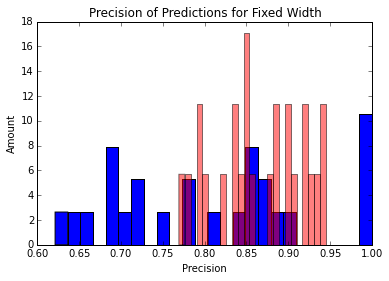

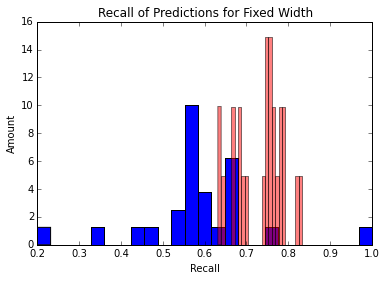

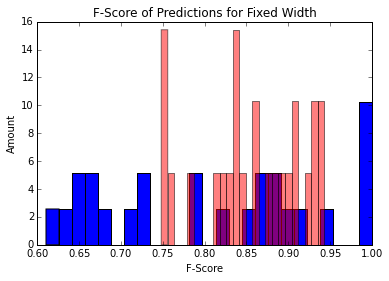

In [28]:
plt.title("Precision of Predictions for Fixed Width")
plt.xlabel("Precision")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["Precision"]) for means in results[:25]], 25, normed=True, color='b', alpha=1, label='Band 9')
plt.hist([np.mean(means["Precision"]) for means in results[50:75]], 25, normed=True, color='r', alpha=0.5, label='Band 7')
plt.show()

plt.title("Recall of Predictions for Fixed Width")
plt.xlabel("Recall")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["Recall"]) for means in results[:25]], 25, normed=True, color='b', alpha=1, label='Band 9')
plt.hist([np.mean(means["Recall"]) for means in results[50:75]], 25, normed=True, color='r', alpha=0.5, label='Band 7')
plt.show()

plt.title("F-Score of Predictions for Fixed Width")
plt.xlabel("F-Score")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["F-Score"]) for means in results[:25]], 25, normed=True, color='b', alpha=1, label='Band 9')
plt.hist([np.mean(means["F-Score"]) for means in results[50:75]], 25, normed=True, color='r', alpha=0.5, label='Band 7')
plt.show()

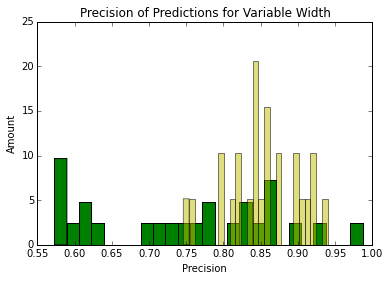

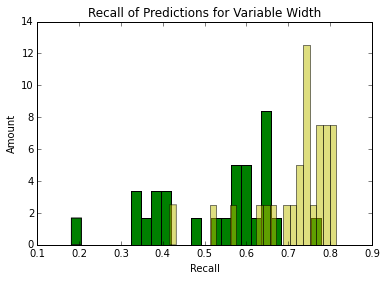

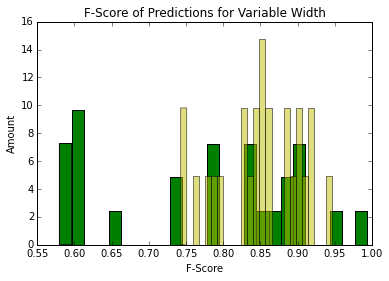

In [30]:
plt.title("Precision of Predictions for Variable Width")
plt.xlabel("Precision")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["Precision"]) for means in results[25:50]], 25, normed=True, color='g', alpha=1, label='Band 9')
plt.hist([np.mean(means["Precision"]) for means in results[75:]], 25, normed=True, color='y', alpha=0.5, label='Band 7')
plt.show()

plt.title("Recall of Predictions for Variable Width")
plt.xlabel("Recall")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["Recall"]) for means in results[25:50]], 25, normed=True, color='g', alpha=1, label='Band 9')
plt.hist([np.mean(means["Recall"]) for means in results[75:]], 25, normed=True, color='y', alpha=0.5, label='Band 7')
plt.show()

plt.title("F-Score of Predictions for Variable Width")
plt.xlabel("F-Score")
plt.ylabel("Amount")
plt.legend()
plt.hist([np.mean(means["F-Score"]) for means in results[25:50]], 25, normed=True, color='g', alpha=1, label='Band 9')
plt.hist([np.mean(means["F-Score"]) for means in results[75:]], 25, normed=True, color='y', alpha=0.5, label='Band 7')
plt.show()

Blending case

In [ ]:
file_path = "data/cube_fixed_width_6.fits"
train_pixel = (1, 1)
x = get_freq_index_from_params(cube_params)
y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
plt.plot(x, y)
plt.legend(loc='upper right')
plt.xlim(xmin = 605075, xmax = 605275)
plt.ylim(ymin = -1,ymax = 1)

lines = get_lines_from_fits(file_path)
current_isotopes = [""]
for line in lines:
    isotope_frequency = int(line[1])
    isotope_name = line[0] + "-f" + str(line[1])
    if isotope_frequency in range(605075, 605275) \
    and line[0] not in current_isotopes:
        # Shows lines really present
        plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g', linewidth=2, label='Present Line')
        plt.text(isotope_frequency, -0.3, isotope_name, size='8', rotation='vertical')
        current_isotopes.append(line[0])

plt.title("Blending case")
plt.xlabel("Frequency [MHz]")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.ylabel("Normalized Temperature")
plt.legend()
plt.show()

Hyperfine lines case

In [ ]:
file_path = "data/cube_fixed_width_6.fits"
train_pixel = (1, 1)
x = get_freq_index_from_params(cube_params)
y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
plt.plot(x, y)
plt.legend(loc='upper right')
plt.xlim(xmin = 605335, xmax = 605410)
plt.ylim(ymin = -1,ymax = 1)

lines = get_lines_from_fits(file_path)
for line in lines:
    isotope_frequency = int(line[1])
    isotope_name = line[0] + "-f" + str(line[1])
    if isotope_frequency in range(605335, 605410):
        # Shows lines really present
        plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g', linewidth=2, label='Present Line')
        plt.text(isotope_frequency, -0.3, isotope_name, size='8', rotation='vertical')

plt.title("Hyperfine lines case")
plt.xlabel("Frequency [MHz]")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.ylabel("Normalized Temperature")
plt.legend()
plt.show()

Double peaks for single Line

In [ ]:
file_path = "data/cube_fixed_width_13.fits"
train_pixel = (1, 1)
x = get_freq_index_from_params(cube_params)
y = get_values_filtered_normalized(file_path, train_pixel, cube_params)
plt.plot(x, y)
plt.legend(loc='upper right')
plt.xlim(xmin = 605850, xmax = 606000)
plt.ylim(ymin = -1,ymax = 1)

lines = get_lines_from_fits(file_path)
for line in lines:
    isotope_frequency = int(line[1])
    isotope_name = line[0] + "-f" + str(line[1])
    if isotope_frequency in range(605850, 606000):
        # Shows lines really present
        plt.axvline(x=isotope_frequency, ymin=0, ymax= 3, color='g', linewidth=2, label='Present Line')
        plt.text(isotope_frequency, -0.3, isotope_name, size='8', rotation='vertical')

plt.title("Double peaks for single Line")
plt.xlabel("Frequency [MHz]")
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.ylabel("Normalized Temperature")
plt.legend()
plt.show()

In [31]:
np.mean([np.mean(means["F-Score"]) for means in results])

0.82156968259107699

In [32]:
min_distance_req_list = pd.DataFrame([])
for i in range(0, 100):
    if (i == 0 or i == 50):
        cube_name = 'data/cube_fixed_width_'
    if (i == 25 or i == 75):
        cube_name = 'data/cube_variable_width_'
        
    file_path = cube_name + str(i) + '.fits'
    lines = get_lines_from_fits(file_path)
       
    sorted_lines = sorted([lines[idx][1] for idx in range(0, len(lines) )])
    min_distance_req = True
    
    last_freq = float(sorted_lines[0])
    for idx in  range(1, len(sorted_lines)):
        distance = float(sorted_lines[idx]) - last_freq
        if(distance < 2):
            min_distance_req = False
            break
        last_freq = float(sorted_lines[idx])
    
    if len(min_distance_req_list) == 0:
        if (min_distance_req):
            min_distance_req_list = [i]
    else:
        if (min_distance_req):
            min_distance_req_list.append(i)

In [33]:
min_distance_req_list


[0,
 1,
 3,
 5,
 7,
 11,
 12,
 14,
 16,
 17,
 18,
 20,
 21,
 30,
 32,
 33,
 35,
 36,
 37,
 39,
 41,
 42,
 43,
 45,
 46,
 47,
 49,
 50,
 54,
 55,
 61,
 62,
 64,
 66,
 67,
 68,
 70,
 75,
 79,
 80,
 86,
 87,
 89,
 91,
 92,
 95]

In [34]:
results_filtered = [results[min_distance_req_list[0]]]
for ix in min_distance_req_list[1:]:
    results_filtered.append(results[ix])

In [36]:
np.mean([np.mean(means["F-Score"]) for means in results_filtered])

0.87342231171537399

In [37]:
[np.mean(means["F-Score"]) for means in results]

[0.86540861385917045,
 1.0,
 0.6548340401780971,
 1.0,
 0.67075802554111441,
 0.79728854608279098,
 0.67702392054617744,
 0.79590186093299575,
 0.70580697240019696,
 0.85664394048292103,
 0.73077735528386778,
 0.81965678337271664,
 0.87434285861082972,
 0.64907996021424208,
 0.90969423511353664,
 0.66774916982588861,
 0.88587904035430387,
 0.88102051795675962,
 1.0,
 0.61050568486176771,
 1.0,
 0.94664464528941039,
 0.72591011649789217,
 0.63103379232362822,
 0.89421352533016429,
 0.8673263003329782,
 0.60675134060565339,
 0.64916477204572542,
 0.89787735235745314,
 0.58712977350409457,
 0.78170822480936397,
 0.60121711072009487,
 0.73345884899990976,
 0.89999604531394772,
 0.60433170408825088,
 0.88427577126332879,
 0.95258764832009002,
 0.88275307631105959,
 0.60309945356254735,
 0.7884096219907365,
 0.57988273389083889,
 0.8306026375330442,
 0.78492860788015428,
 0.84347030899878639,
 0.58905963936197403,
 0.8447628925351014,
 0.99323557066029811,
 0.84349886967646193,
 0.9015428733